In [520]:
import tensorflow as tf
from src.DataGenerator import DataGenerator
from src.progress_bar import progress_bar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyarrow import feather
import time
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [510]:
autoencoder = tf.keras.models.load_model('data/autoencoder')

In [511]:
prediction_gen = DataGenerator(directory='data/Spotify/pngs/', batch_size=1, shuffle=False)

Found 178024 files for Generator set


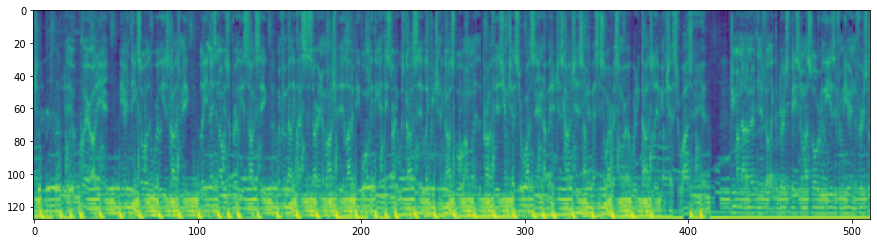

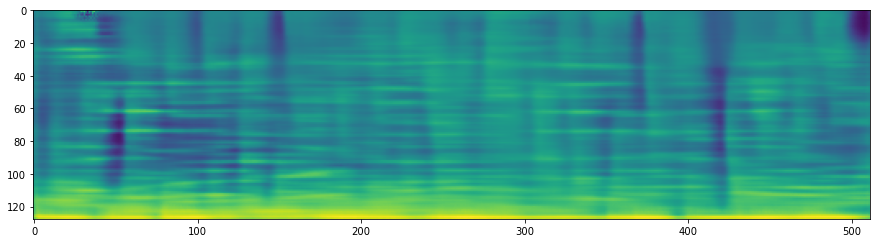

In [512]:
test_img = prediction_gen.take(3456)[0]

prediction = autoencoder(test_img)

plt.figure(figsize=(15,5))
plt.imshow(test_img[0])
plt.show()
plt.figure(figsize=(15,5))
plt.imshow(np.array(prediction[0]*255))

In [476]:
results = []
start_time = time.time()
search_range = 178000
for i in range(search_range):
    filename, latent_img, _ = prediction_gen.take(i, return_filename=True)
    
    latent_space = np.array(autoencoder.encoder(latent_img))[0]
    
    result={
        'id':str(filename[0]).split('.')[0],
        'filename':str(filename[0]),
          }
    for idx, col in enumerate(latent_space):
        result[f'latent_{idx}'] = col
        
    results.append(result)
    

print('total time in minutes:',(time.time()-start_time)/60)
    

total time in minutes: 48.356304029623665


In [477]:
results_df = pd.DataFrame(results)

In [478]:
results_df

,id,filename,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,latent_54,latent_55,latent_56,latent_57,latent_58,latent_59,latent_60,latent_61,latent_62,latent_63
0,2e2aOrLcQTUEXR4hqRmZu5,2e2aOrLcQTUEXR4hqRmZu5.png,-307.621033,274.109589,46.325954,-421.391846,27.933636,-474.726532,-278.631653,125.691116,...,-119.321503,136.182648,-88.506310,141.477142,180.350418,-208.743759,272.335663,-264.577667,309.157776,247.878006
1,3amqcqX7csFJLBdIxwOdiW,3amqcqX7csFJLBdIxwOdiW.png,-340.062653,338.539307,-17.537346,-437.892853,110.616829,-447.280945,-170.875885,139.793518,...,-201.916412,132.663361,-31.283587,59.980808,349.768036,-297.171814,302.810333,-40.734615,309.989624,230.996872
2,22eaeE3cqnf7K15mZPnTLe,22eaeE3cqnf7K15mZPnTLe.png,-311.638275,453.743225,-7.799480,-408.811493,241.264221,-555.136597,-432.876465,274.250214,...,-191.901321,227.110397,-181.142075,115.100426,428.493408,-218.030594,613.052429,-141.088379,630.077332,109.809715
3,3W274QwyqgFF9A35L3WSD3,3W274QwyqgFF9A35L3WSD3.png,-400.694092,384.137878,-160.571228,-554.613464,19.894245,-399.602661,-325.865509,206.296875,...,-238.098541,-25.832968,-169.015900,213.374466,349.042389,-281.869202,489.741089,-303.155853,327.660858,322.174072
4,7EayHugLOr5fZBwRGMA4aF,7EayHugLOr5fZBwRGMA4aF.png,-175.979874,448.999664,-234.282562,-557.768250,114.330482,-401.983765,-347.589508,275.321625,...,-68.470589,-2.678618,-66.217010,-28.456446,293.624420,-256.767487,462.570465,-139.375427,488.217712,229.047363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177995,2O869O6SrmTBllkHeg5ilj,2O869O6SrmTBllkHeg5ilj.png,-161.897461,245.648849,32.996895,-489.795654,141.504120,-361.196899,-353.115875,161.211304,...,-134.926834,187.003296,-133.975220,114.845375,332.243958,-178.671967,594.694580,-234.474121,346.082397,131.678375
177996,2JzNBGnadj4bkVs3gzcdg5,2JzNBGnadj4bkVs3gzcdg5.png,-235.292526,356.773407,193.060501,-455.665436,177.433014,-362.037872,-384.611145,17.977009,...,-124.634865,115.532249,-147.386536,217.109909,262.574219,-261.980194,517.167969,-221.402359,419.978973,248.846893
177997,6iaFQG0IPF8x3WtZqYRiyI,6iaFQG0IPF8x3WtZqYRiyI.png,-314.443878,248.275085,-24.564520,-384.044098,117.946320,-455.938690,-258.029572,-91.954781,...,-30.453829,175.610687,-148.600113,86.066040,151.301788,-125.959457,388.758759,-275.624115,400.205322,405.906769
177998,7hXrwJbYEgh8gYp7v2KCYc,7hXrwJbYEgh8gYp7v2KCYc.png,-309.074371,337.678406,-92.539169,-408.503418,186.263626,-475.770752,-307.763580,78.505310,...,-76.757126,235.549225,-197.694412,109.901932,345.948029,-53.852291,435.903625,-148.605820,272.767822,149.470581


In [479]:
tracks_df = feather.read_feather('data/all_tracks.feather')

In [480]:
track_latents = results_df.merge(tracks_df, how='left', left_on='id', right_on='track_id')

In [481]:
track_latents = track_latents.drop_duplicates(subset='id')

In [482]:
track_latents = track_latents.reset_index(drop=True)

In [522]:
latent_cols = [f'latent_{i}' for i in range(256)]
scaler = StandardScaler()
track_latent_scaled = scaler.fit_transform(track_latents[latent_cols])
track_latents[latent_cols] = track_latent_scaled

In [516]:
feather.write_feather(track_latents, 'data/track_latents_256.feather')

In [500]:
track_latents = feather.read_feather('data/track_latents.feather')

<AxesSubplot:>

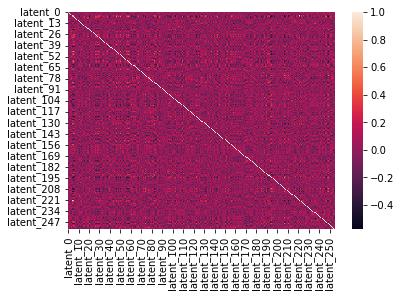

In [523]:
sns.heatmap(track_latents[latent_cols].corr())

In [501]:
artist_latents = track_latents.groupby('artist_name').mean().dropna()
artist_latents.drop(columns=['track_popularity', 'artist_popularity'], inplace=True)

In [502]:
genre_rows = []
for idx, row in track_latents.iterrows():
    for genre in row.artist_genres:
        new_row = row
        new_row['genre'] = genre
        genre_rows.append(new_row)        
genre_latents = pd.DataFrame(genre_rows)
genre_latents = genre_latents.groupby('genre').mean().dropna()
genre_latents.drop(columns=['track_popularity', 'artist_popularity'], inplace=True)

In [503]:
genre_latents

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
genre,,,,,,,,,,,,,,,,,,,,,
48g,-0.145965,-0.085359,-0.622928,0.270179,-0.528678,-0.846446,0.177758,0.324067,-0.099851,0.186926,...,-0.607314,-0.265111,0.111755,0.602776,-0.496391,-0.403945,-0.263818,0.255516,-0.276421,-0.355949
5th wave emo,0.481634,-0.172048,0.236132,-0.046280,-0.518844,-0.107663,-0.079895,0.403539,-0.014562,0.186119,...,0.121016,0.393885,-0.496705,0.009260,0.003554,0.434166,0.415025,-0.185865,0.203496,-0.406572
a cappella,0.577312,0.938835,-0.320112,0.203663,0.170610,-0.140532,-1.136885,-0.902079,0.333214,0.225977,...,0.161459,0.006823,-0.065818,0.404853,0.203247,0.401060,-0.267293,-0.218425,-0.746525,-0.206884
abstract beats,0.094377,-0.171187,-0.249867,-0.174506,0.996409,0.367215,-0.712087,-0.060177,-0.219834,-0.160081,...,0.503604,-0.046326,-0.498896,0.202522,-0.087120,0.142053,-0.711878,-0.420736,0.479812,-0.018747
abstract hip hop,-0.004190,-0.002217,0.103251,0.244331,0.148475,0.051087,-0.248045,0.000774,-0.157312,0.015436,...,-0.013306,0.068177,0.008462,0.091697,-0.086228,0.199172,-0.103967,0.058889,0.141397,-0.127593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zolo,-0.003856,-0.048313,0.097663,-0.044526,-0.014840,0.171445,0.221108,-0.009974,0.108585,-0.100560,...,0.027364,0.130282,0.005324,-0.282145,-0.029262,0.029628,-0.013393,-0.012671,-0.061414,0.002376
zouglou,0.126533,-0.033381,-0.016377,0.187195,-0.009011,-0.549372,-0.235403,-0.409025,-0.011549,0.229390,...,-0.329381,-0.275556,0.238984,0.420942,-0.312846,-0.193459,-0.454667,-0.173488,-0.436335,-0.147895
zouk,0.324599,0.065718,-0.036013,0.052616,0.114402,-0.507836,-0.379928,-0.000709,0.045554,-0.048233,...,-0.371981,-0.286325,0.134902,0.368678,-0.055606,-0.085356,-0.502399,-0.028530,-0.099965,-0.111935


In [504]:
def get_similar_tracks(vector, df, num=10):
    track_similarity = cosine_similarity(np.array([track_latents.loc[df_index, latent_cols]]), np.array(track_latents[latent_cols]))

    track_similarity_df = track_latents.copy()
    track_similarity_df['track_similarity'] = track_similarity.T

    return track_similarity_df.sort_values(by='track_similarity', ascending=False)[['track_name','artist_name', 'track_uri','track_similarity']][:num]

def get_similar_artists(df_index, num=10):

    artist_similarity = cosine_similarity(np.array([track_latents.loc[df_index, latent_cols]]), np.array(artist_latents[latent_cols]))

    artist_similarity_df = artist_latents.copy()
    artist_similarity_df['artist_similarity'] = artist_similarity.T

    return artist_similarity_df.sort_values(by='artist_similarity', ascending=False).reset_index()[['artist_name','artist_similarity']][:num]

def get_similar_genres(df_index, num=10):
    genre_similarity = cosine_similarity(np.array([track_latents.loc[df_index, latent_cols]]), np.array(genre_latents[latent_cols]))

    genre_similarity_df = genre_latents.copy()
    genre_similarity_df['genre_similarity'] = genre_similarity.T

    return genre_similarity_df.sort_values(by='genre_similarity', ascending=False).reset_index()[['genre','genre_similarity']][:num]

In [505]:
track_latents[track_latents['track_name'].str.contains('Mambo')]['track_uri']

1836      spotify:track:3nMfrOeF2OQ7IPq1lB2jei
2537      spotify:track:2RqQ71sHd5lRgQnO85vt12
3778      spotify:track:1O6BQlENibmpS8wtTI88Gg
13835     spotify:track:00MvNfAAC4O5pSvAZPDnGc
15890     spotify:track:18hoGhRHSr0rDwj8V9bsAZ
16314     spotify:track:3ZRmWA1uVqapcOvQUt1xgu
17285     spotify:track:2M4XvP1G6tI8fvkKkpKl9C
21031     spotify:track:3Wzwywq5QQweT0WzwSnvrX
21982     spotify:track:1Qiv7ahH5tjBtvDK4dRZjg
23067     spotify:track:0o8vFG6BBC9y6UhVkLv1PF
31231     spotify:track:5kRxxNZkwCg4cOwhtv0QkF
33256     spotify:track:6X58jbcFfnly1kbkiHGKse
34656     spotify:track:31tEgzedhAb2zllml0m50n
39758     spotify:track:6U9MGpSvg2fmAz6txUv5uG
39834     spotify:track:16FVWNJPRYEdRzYMs5JAcW
48910     spotify:track:0VkHbdSv5GZBmWeoarpmfi
51541     spotify:track:4iHlHp0YYZ0qC5TAcp3tMF
51888     spotify:track:6AG5jVPwROJ3Vp2C0mETvN
59444     spotify:track:0wlTJA6ATDuAI83KdAXwmV
61041     spotify:track:2tvC38UTkdcGUhcTT0elVx
61537     spotify:track:71e9JVgk1A85Y0s9MTrHY6
68609     spo

In [509]:
search_id = 111794

display(get_similar_tracks(search_id))
display(get_similar_artists(search_id))
display(get_similar_genres(search_id))

,track_name,artist_name,track_uri,track_similarity
111794,Mambo Craze,Vanillounge,spotify:track:5IGU4poSRqtlcw7Rk7xmW8,1.000000
21982,Mambo Craze,NYC Jazz Quartett,spotify:track:1Qiv7ahH5tjBtvDK4dRZjg,0.999953
31960,You Rascal You,Hanni El Khatib,spotify:track:0BnzymJQLY5a3YHODuaYbO,0.599533
86622,"""Me, Who Am I?""",Santino Fontana,spotify:track:2Nk1ZdbSAgzaPzfUN5IuPQ,0.599219
60720,Mr. Cladwell,John Cullum,spotify:track:2jguMcLIOf5QbTAtpTCdAr,0.563285
65854,Grande amore,Il Volo,spotify:track:4IzDqftkFXUR8G2vaTd3Rb,0.542416
92505,Guiding Star,Elane,spotify:track:2u98usTD0UNbzaRE8HKsGr,0.539667
62893,"Schönberg, Claude-Michel: I Dreamed a Dream (f...",Alain Boublil,spotify:track:1Zw60qtv4nv29mIrFkaQod,0.537875
18400,"Schönberg, Claude-Michel: I Dreamed a Dream (f...",Lesley Garrett,spotify:track:02SO3ikjtfG1avKhU3jQdw,0.537875
44420,Night Surgeon,Anthony Stewart Head,spotify:track:09OwM0ds42BbreHQSntmyH,0.533083


,artist_name,artist_similarity
0,The Ten Tenors,0.523738
1,Santino Fontana,0.523462
2,Basil Valdez,0.522577
3,Alfred Drake,0.496639
4,Alain Boublil,0.494603
5,Naiwen Yang,0.494011
6,Les Misérables: International Cast,0.493543
7,Chomel,0.477462
8,Christine Andreas,0.475732
9,The 'Les Misérables 2010' Company,0.472770


,genre,genre_similarity
0,vintage broadway,0.420358
1,manila sound,0.408597
2,khayal,0.405643
3,tamil devotional,0.405504
4,nasyid,0.393977
5,show tunes,0.390183
6,zim gospel,0.379540
7,indonesian r&b,0.367047
8,pinoy r&b,0.364642
9,spanish classical,0.352195


In [558]:
def create_feature_importance_vector(index, length):
    ones = np.ones(length)
    ones[index] = 0
    
    return ones

In [563]:
track_similarity = cosine_similarity(np.array([create_feature_importance_vector(1,256)]), np.array(track_latents[latent_cols]))

track_similarity_df = track_latents.copy()
track_similarity_df['track_similarity'] = track_similarity.T

track_similarity_df.sort_values(by='track_similarity', ascending=False)[['track_name','artist_name', 'track_uri','track_similarity']][:10]


,track_name,artist_name,track_uri,track_similarity
6906,Fratello - Dubfire Remix,Joseph Capriati,spotify:track:4VJ81UUUq4Cmd4qzyRx3re,0.283889
110419,Pocketful of Memories,Edmund Leung,spotify:track:3xxtv4a4fFbhYlTDrH9Ual,0.283116
139837,"Dialling In, Falling out",Raime,spotify:track:6RR7OcNNaVd3l8xSCnoYoV,0.275187
95492,Quién Podrá Saberlo - Novalima Remix,Novalima,spotify:track:60IwuJJlatAW1JIAFXBJQA,0.267525
148318,I Need You VIP,Graphics,spotify:track:4bscrkcVkDx8qaWHD0oZmx,0.267181
91420,Black Ink (feat. Mackenzie Nicole),Prozak,spotify:track:6vYHSoZ5I9jGSuFHpH0QAC,0.264978
39600,I coldly stare out,Pink Turns Blue,spotify:track:2uosaArzNay7YtHKVohcPa,0.262692
129809,Du hast vergessen wie man lebt,Klopfgeister,spotify:track:6ROK52VmN4BFGNQ0clDOX5,0.254284
32668,The Right Way,Casa del Mirto,spotify:track:7rL30QwHVchxnjxRSyLS2W,0.249904
93743,Duacı,Cevher,spotify:track:4Rc52pZSMml1NyJPABKmSB,0.248153


In [527]:
track_latents[latent_cols].describe()

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
count,1.500000e+05,1.500000e+05,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,...,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,-5.416870e-09,6.739298e-09,0.000000,-2.237956e-09,-5.594890e-10,4.959106e-09,-5.334218e-09,6.268819e-09,5.416870e-09,-9.409586e-10,...,-1.856486e-09,5.238851e-09,8.239746e-09,-6.103515e-10,1.471837e-09,-4.692078e-09,5.658467e-09,8.850098e-09,-6.612142e-09,3.611247e-09
std,1.000003e+00,1.000003e+00,1.000003,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-8.536193e+00,-4.837113e+00,-5.322198,-5.862002e+00,-4.626258e+00,-5.469433e+00,-4.673037e+00,-6.864099e+00,-7.528718e+00,-5.639807e+00,...,-6.411291e+00,-5.148799e+00,-5.506109e+00,-6.427814e+00,-1.105881e+01,-5.451829e+00,-5.327870e+00,-5.097373e+00,-1.001224e+01,-8.344625e+00
25%,-6.359281e-01,-6.405971e-01,-0.616575,-6.317304e-01,-7.043544e-01,-6.602552e-01,-6.408934e-01,-6.244676e-01,-6.361141e-01,-6.232703e-01,...,-6.540849e-01,-6.477554e-01,-6.036105e-01,-5.643722e-01,-6.313958e-01,-6.396754e-01,-6.361640e-01,-6.453491e-01,-5.929356e-01,-6.239076e-01
50%,1.675644e-02,-1.501666e-02,0.032101,2.090381e-02,-4.293431e-02,-1.307821e-01,-3.442196e-03,2.522110e-02,1.045135e-02,9.626466e-03,...,-4.565975e-02,-3.606557e-02,5.891779e-02,1.016499e-01,-4.235166e-03,-2.305744e-02,9.060706e-03,3.329589e-03,4.043949e-02,-1.835975e-02
75%,6.506993e-01,6.158163e-01,0.647815,6.514543e-01,6.131112e-01,4.949328e-01,6.208032e-01,6.457679e-01,6.468601e-01,6.263016e-01,...,6.063142e-01,6.116734e-01,6.589272e-01,6.724028e-01,6.238490e-01,6.077714e-01,6.351112e-01,6.434460e-01,6.303592e-01,6.035744e-01
max,5.778917e+00,7.526031e+00,7.300407,5.158087e+00,4.609264e+00,5.411451e+00,9.269867e+00,1.381080e+01,5.417656e+00,8.640130e+00,...,8.866981e+00,5.217221e+00,6.028955e+00,5.345821e+00,5.964912e+00,8.333681e+00,9.749331e+00,1.270396e+01,8.695009e+00,7.301279e+00


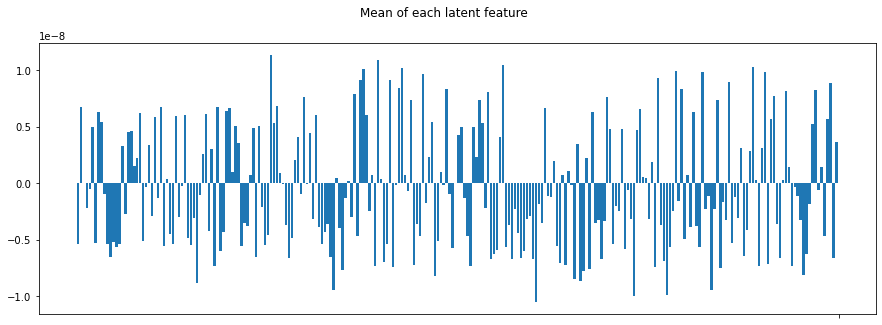

In [550]:
fig = plt.figure(figsize=(15,5))
plt.bar(latent_cols,track_latents[latent_cols].mean())
plt.suptitle('Mean of each latent feature')
plt.xticks('')
plt.show()

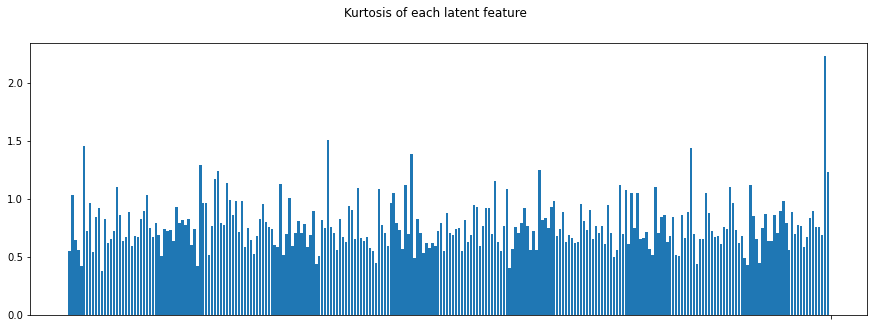

In [548]:
from scipy.stats import kurtosis
fig = plt.figure(figsize=(15,5))
plt.bar(latent_cols,kurtosis(track_latents[latent_cols]))
plt.suptitle('Kurtosis of each latent feature')
plt.xticks('')
plt.show()